In [1]:
!pip install -Uqq fastai duckduckgo_search

#why is this in the original?
#import os
#iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

#if iskaggle:
 #   !pip install -Uqq fastai duckduckgo_search
    
    
#where is ddg_images documented? https://pypi.org/project/duckduckgo-search/#3-images---image-search-by-duckduckgocom
from fastcore.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastai.vision.all import *
from duckduckgo_search import DDGS

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.2 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.1.0 which is incompatible.


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# helpful functions to DRY

# need to make sure this is closed later on
def search_ddg(search_terms):
    ddgs = DDGS()
    return ddgs.images(
        keywords = search_terms,
        region="wt-wt",
        safesearch="moderate",
        type_image="photo",
    )


In [3]:
    #doesn't work
dolphins = search_ddg('dolphin')
manatees = search_ddg('manatee')
whales = search_ddg('whale')
print(type(dolphins))

dolphin = next(dolphins)
manatee = next(manatees)
whale = next(whales)
print(dolphin)
print(dolphin['image'])
print(manatee)
print(manatee['image'])
print(whale)
print(whale['image'])


<class 'generator'>
{'title': 'Dolphin 4k Ultra HD Wallpaper', 'image': 'https://images.alphacoders.com/293/293531.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.iEJ06_DV_5PHBbDWIZ6ZqQHaF1&pid=Api', 'url': 'https://wall.alphacoders.com/big.php?i=293531', 'height': 3781, 'width': 4800, 'source': 'Bing'}
https://images.alphacoders.com/293/293531.jpg
{'title': 'Manatees were once important Seminole food source • The Seminole Tribune', 'image': 'http://seminoletribune.org/wp-content/uploads/2019/04/Manatee-1.jpg', 'thumbnail': 'https://tse1.mm.bing.net/th?id=OIP.x31nae0GHXce_eSC5-KnIAHaE8&pid=Api', 'url': 'https://seminoletribune.org/manatees-were-once-important-seminole-food-source/', 'height': 1600, 'width': 2400, 'source': 'Bing'}
http://seminoletribune.org/wp-content/uploads/2019/04/Manatee-1.jpg
{'title': 'Fascinating Humpback Whale Facts', 'image': 'https://fthmb.tqn.com/l1vhEscfQQUiCi9W8ZpJ79vc144=/5200x3313/filters:fill(auto,1)/humpback-whale-underwater-portrait--107312834-

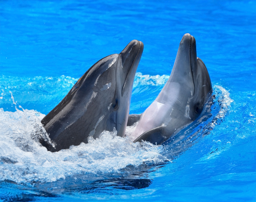

In [4]:
dest = 'dolphin.jpg'
download_url(dolphin['image'], dest, show_progress=True)
img = Image.open(dest)
img.to_thumb(256,256)